In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns 
import scipy

In [48]:
# Get the data

seg_data = pd.read_csv("/Users/rebeccawagner/Documents/GitHub/GerryGainMCMC/Data/50k_output/Seg_100_200_300_400_50000all.csv")
seg_data = seg_data.set_index('Unnamed: 0')
seg_data.index.name = None
seg_data = seg_data.drop(columns="1")

# Get all scores as list in order
seg_scores = np.sort(seg_data.stack().values)

seg_data



,2,3,4,5,6,7,8,9,10,11,...,49991,49992,49993,49994,49995,49996,49997,49998,49999,50000
1001,18.550356,18.550356,18.550356,18.550356,18.550356,0.358454,3.070203,3.070203,3.070203,3.070203,...,-2.972752,-2.972752,0.329840,0.329840,0.329840,0.482527,0.482527,0.482527,0.482527,0.482527
1002,-7.150571,-4.876559,-8.571489,-3.834800,-7.021390,-7.021390,-7.021390,-7.021390,-8.584359,-8.584359,...,0.889890,0.889890,0.889890,0.889890,0.889890,0.889890,0.889890,0.889890,0.889890,0.889890
1003,-3.792898,-6.062259,-2.364924,-7.112741,-3.919550,-3.919550,-3.919550,-3.919550,-2.374068,-2.374068,...,-2.216280,-2.216280,-2.216280,-2.216280,-2.216280,-2.216280,-2.216280,-2.216280,-2.111429,-2.111429
1004,-10.025746,-10.025746,-10.025746,-10.025746,-10.025746,-10.025746,-10.025746,1.028736,1.028736,1.028736,...,0.602711,0.503406,0.503406,0.604306,0.613735,0.613735,0.588389,0.727916,0.727916,0.417033
1005,0.198728,0.198728,0.198728,0.198728,0.198728,0.198728,0.198728,-10.830530,-10.830530,1.297119,...,-4.925975,-4.925975,-4.925975,-4.925975,-4.925975,-4.925975,-4.925975,-4.925975,-5.039934,-5.039934
1006,-14.170530,-14.170530,-14.170530,-14.170530,-14.170530,4.315877,1.627208,1.627208,1.627208,-10.479123,...,-8.596270,-8.481295,-8.481295,-8.596801,-8.623835,-8.623835,-8.590385,-8.746658,-8.746658,-8.379992
1007,-0.531932,-0.531932,-0.531932,-0.531932,-0.531932,-0.531932,-0.531932,-0.531932,-0.531932,-0.531932,...,0.439966,0.439966,-2.888862,-2.888862,-2.888862,-3.015241,-3.015241,-3.015241,-3.015241,-3.015241


In [49]:
alarm_data = pd.read_csv("/Users/rebeccawagner/Documents/GitHub/GerryGainMCMC/alarm_seg_scores_alabama.csv")["seg_nh_black"]
alarm_data_scores = np.sort(alarm_data.values)
alarm_data_scores

array([-18.111483, -17.644972, -17.644972, ...,  13.274328,  13.274328,
        13.923686])

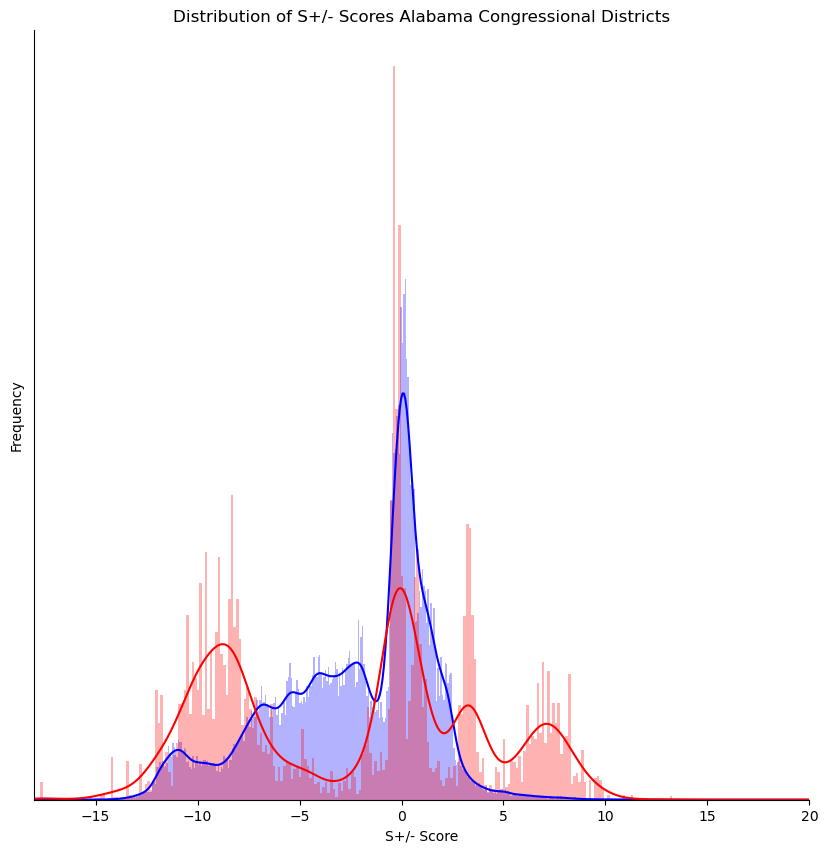

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

ax.hist(seg_scores, bins=500, rwidth=1, alpha=.3, color="b", label="all", density=True)
ax = pd.DataFrame(seg_scores).plot(kind='density', ax=ax, color="blue",legend=False)

ax.hist(alarm_data_scores, bins=250, rwidth=1, alpha=.3, color="red", label="all", density=True)
ax = pd.DataFrame(alarm_data_scores).plot(kind='density', ax=ax, color="red",legend=False)
 
#ax.grid(which='major', axis='y', linestyle=':', color='gray', alpha=0.5)

#ax.vlines(x=np.mean(seg_scores),ymin=0,ymax=.29, color="grey",linestyle="dashed")


ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlabel("S+/- Score")
ax.set_ylabel("Frequency")

ax.axes.yaxis.set_ticks([])

#plt.xticks(list(plt.xticks()[0])+ ticks)
plt.xlim((-18,20))
plt.title("Distribution of S+/- Scores Alabama Congressional Districts")




plt.show()



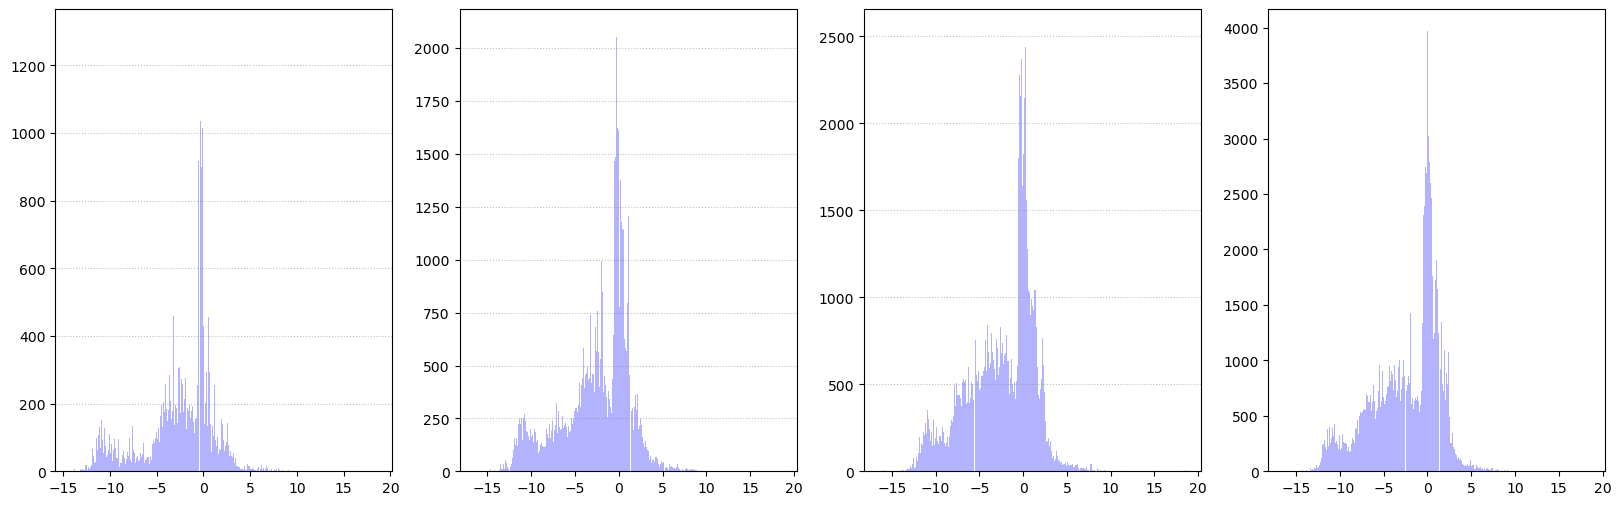

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols = 4, figsize=(20,6))

ax1.hist(seg_data.iloc[:,:10000].stack().values, bins=1000, rwidth=.99, alpha=.3, color="b")
ax2.hist(seg_data.iloc[:,:25000].stack().values, bins=1000, rwidth=.99, alpha=.3, color="b")
ax3.hist(seg_data.iloc[:,:37500].stack().values, bins=1000, rwidth=.99, alpha=.3, color="b")
ax4.hist(seg_data.stack().values, bins=1000, rwidth=.99, alpha=.3, color="b")

for ax in (ax1, ax2, ax3):  
    ax.grid(which='major', axis='y', linestyle=':', color='gray', alpha=0.5)
plt.show()

In [52]:
meta_data = pd.read_csv("/Users/rebeccawagner/Documents/GitHub/GerryGainMCMC/Data/50k_output/Meta_100_200_300_400_50000all.csv")
meta_data.columns = [x.replace(".0","") for x in list(meta_data.columns)]
meta_data

,Iteration,1,2,3,4,5,6,7,8,9,...,49991,49992,49993,49994,49995,49996,49997,49998,49999,50000
0,incumbent_issues,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000
1,prop_uncut_edges,0.916444,0.916635,0.914727,0.916063,0.913964,0.915681,0.922167,0.921404,0.931515,...,0.931896,0.931705,0.937047,0.936475,0.93533,0.933422,0.934758,0.934567,0.934567,0.93533
2,county_splits,6.000000,10.000000,13.000000,15.000000,17.000000,16.000000,17.000000,17.000000,18.000000,...,18.000000,18.000000,16.000000,18.000000,17.00000,17.000000,18.000000,18.000000,18.000000,17.00000
3,num_split_counties,6.000000,10.000000,12.000000,14.000000,17.000000,15.000000,16.000000,16.000000,17.000000,...,17.000000,17.000000,14.000000,16.000000,15.00000,15.000000,16.000000,16.000000,16.000000,15.00000
4,oversplit_counties,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.00000
5,black_majority,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000


In [53]:
meta_data = meta_data.transpose()

new_header = meta_data.iloc[0]
meta_data = meta_data[1:]
meta_data.columns = new_header

meta_data

Iteration,incumbent_issues,prop_uncut_edges,county_splits,num_split_counties,oversplit_counties,black_majority
1,0.0,0.916444,6.0,6.0,0.0,1.0
2,0.0,0.916635,10.0,10.0,0.0,1.0
3,0.0,0.914727,13.0,12.0,1.0,1.0
4,0.0,0.916063,15.0,14.0,1.0,1.0
5,0.0,0.913964,17.0,17.0,0.0,1.0
...,...,...,...,...,...,...
49996,1.0,0.933422,17.0,15.0,2.0,0.0
49997,1.0,0.934758,18.0,16.0,2.0,0.0
49998,1.0,0.934567,18.0,16.0,2.0,0.0
49999,1.0,0.934567,18.0,16.0,2.0,0.0


In [60]:
meta_data["oversplit_counties"].values.max()

5.0

In [72]:
# iterations where there are incumbent issues
incumbent_id = meta_data["incumbent_issues"] > 0
meta_data[incumbent_id]

Iteration,incumbent_issues,prop_uncut_edges,county_splits,num_split_counties,oversplit_counties,black_majority
7,1.0,0.922167,17.0,16.0,1.0,0.0
8,1.0,0.921404,17.0,16.0,1.0,0.0
9,1.0,0.931515,18.0,17.0,1.0,0.0
10,1.0,0.929607,17.0,16.0,1.0,0.0
11,1.0,0.928272,18.0,17.0,1.0,0.0
...,...,...,...,...,...,...
49996,1.0,0.933422,17.0,15.0,2.0,0.0
49997,1.0,0.934758,18.0,16.0,2.0,0.0
49998,1.0,0.934567,18.0,16.0,2.0,0.0
49999,1.0,0.934567,18.0,16.0,2.0,0.0


In [62]:
to_drop = list(meta_data[incumbent_id].index)

In [63]:
seg_data.drop(columns=to_drop)

,2,3,4,5,6,7,8,9,10,11,...,49991,49992,49993,49994,49995,49996,49997,49998,49999,50000
1001,18.550356,18.550356,18.550356,18.550356,18.550356,0.358454,3.070203,3.070203,3.070203,3.070203,...,-2.972752,-2.972752,0.329840,0.329840,0.329840,0.482527,0.482527,0.482527,0.482527,0.482527
1002,-7.150571,-4.876559,-8.571489,-3.834800,-7.021390,-7.021390,-7.021390,-7.021390,-8.584359,-8.584359,...,0.889890,0.889890,0.889890,0.889890,0.889890,0.889890,0.889890,0.889890,0.889890,0.889890
1003,-3.792898,-6.062259,-2.364924,-7.112741,-3.919550,-3.919550,-3.919550,-3.919550,-2.374068,-2.374068,...,-2.216280,-2.216280,-2.216280,-2.216280,-2.216280,-2.216280,-2.216280,-2.216280,-2.111429,-2.111429
1004,-10.025746,-10.025746,-10.025746,-10.025746,-10.025746,-10.025746,-10.025746,1.028736,1.028736,1.028736,...,0.602711,0.503406,0.503406,0.604306,0.613735,0.613735,0.588389,0.727916,0.727916,0.417033
1005,0.198728,0.198728,0.198728,0.198728,0.198728,0.198728,0.198728,-10.830530,-10.830530,1.297119,...,-4.925975,-4.925975,-4.925975,-4.925975,-4.925975,-4.925975,-4.925975,-4.925975,-5.039934,-5.039934
1006,-14.170530,-14.170530,-14.170530,-14.170530,-14.170530,4.315877,1.627208,1.627208,1.627208,-10.479123,...,-8.596270,-8.481295,-8.481295,-8.596801,-8.623835,-8.623835,-8.590385,-8.746658,-8.746658,-8.379992
1007,-0.531932,-0.531932,-0.531932,-0.531932,-0.531932,-0.531932,-0.531932,-0.531932,-0.531932,-0.531932,...,0.439966,0.439966,-2.888862,-2.888862,-2.888862,-3.015241,-3.015241,-3.015241,-3.015241,-3.015241


In [66]:
dropped = meta_data.drop(to_drop)

In [71]:
meta_data["oversplit_counties"].values.max()

5.0